# Importing data using Yahoo Finance
Based from  [Imperial College London Algorithmic Trading Course](https://github.com/algotradingsoc/Lectures2022/blob/main/AlgoTradeSocLectures.ipynb)

In [1]:
## Imports
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use("seaborn")

In [2]:
ticker = ["AAPL", "BA", "KO", "GOOGL", "DIS", "XOM" ]
stocks = yf.download(ticker, start = "2012-01-01", end = "2022-09-06") # Retrieves a Pandas Dataframe with one column per 
# Ticker X [Adjusted close, close, high, low, open, volume] (is  a multi level DataFrame)
print(f"Data Type: f{type(stocks)}")
print(f"Columns: {stocks.columns}")
print(f"# Rows: {len(stocks)}") # One Row per day

[*********************100%***********************]  6 of 6 completed
Data Type: f<class 'pandas.core.frame.DataFrame'>
Columns: MultiIndex([('Adj Close',  'AAPL'),
            ('Adj Close',    'BA'),
            ('Adj Close',   'DIS'),
            ('Adj Close', 'GOOGL'),
            ('Adj Close',    'KO'),
            ('Adj Close',   'XOM'),
            (    'Close',  'AAPL'),
            (    'Close',    'BA'),
            (    'Close',   'DIS'),
            (    'Close', 'GOOGL'),
            (    'Close',    'KO'),
            (    'Close',   'XOM'),
            (     'High',  'AAPL'),
            (     'High',    'BA'),
            (     'High',   'DIS'),
            (     'High', 'GOOGL'),
            (     'High',    'KO'),
            (     'High',   'XOM'),
            (      'Low',  'AAPL'),
            (      'Low',    'BA'),
            (      'Low',   'DIS'),
            (      'Low', 'GOOGL'),
            (      'Low',    'KO'),
            (      'Low',   'XOM'),
        

Close data


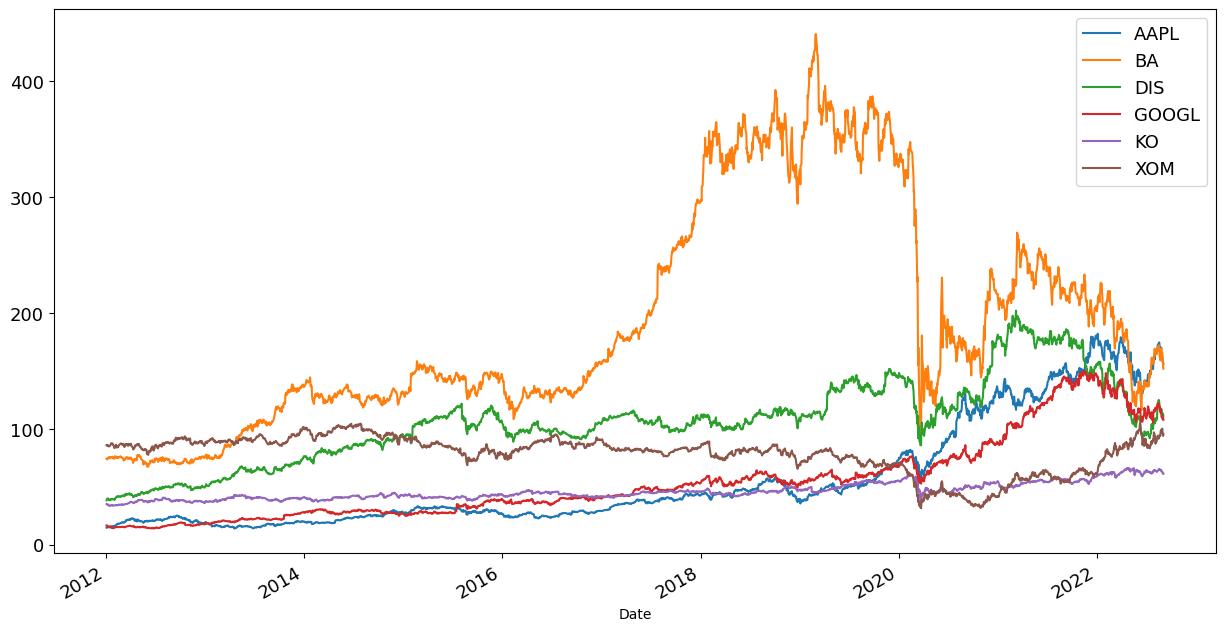

In [3]:
# Useful Commands:
# stocks.swaplevel(axis = 1).sort_index(axis = 1) # Change the levels of headers
# stocks.index = pd.to_datetime(stocks.index) # By default the date is not of type datetime
# stocks.describe() # Quick statistics made by Pandas.
close = stocks.loc[:, "Close"].copy() # Retrieve close data
print("Close data")
close.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()


# Normalization

Normalization is useful when comparing performance of securities with different prices.


In [4]:
# Consider the price of AAPL from the 3rd Dec 2012 onwards
close.AAPL.div(close.AAPL[0]).mul(100)


Date
2012-01-03     100.000000
2012-01-04     100.537408
2012-01-05     101.653575
2012-01-06     102.716242
2012-01-09     102.553316
                 ...     
2022-08-29    1098.810919
2022-08-30    1081.993071
2022-08-31    1070.486112
2022-09-01    1075.524692
2022-09-02    1060.885620
Name: AAPL, Length: 2686, dtype: float64

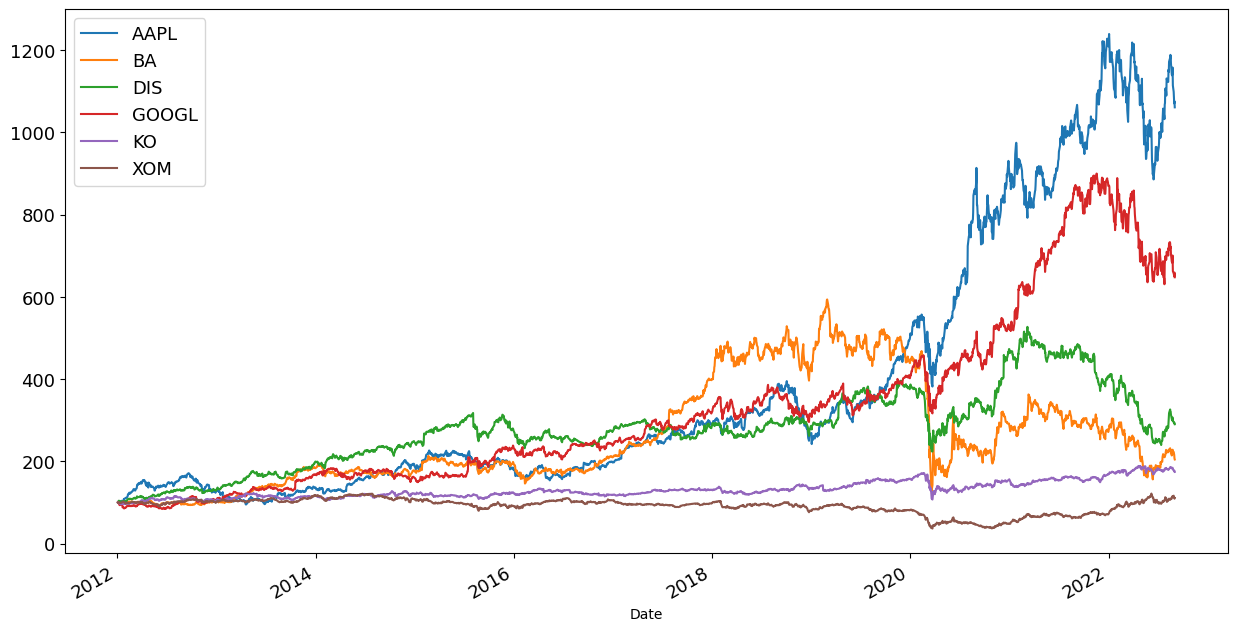

In [5]:
norm = close.div(close.iloc[0]).mul(100)
norm.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

### Obtaining Percentual changes

In [6]:
# Percentual change of price evolution
aapl = close.AAPL.copy().to_frame()
aapl.shift(periods = 1)
aapl["lag1"] = aapl.shift(periods = 1) # Price of the day before
aapl["Diff"] = aapl.AAPL.sub(aapl.lag1) # Difference of price between the day and the day before
aapl["pct_change"] = aapl.AAPL.div(aapl.lag1).sub(1).mul(100) # Percentual Change
aapl.head()

,AAPL,lag1,Diff,pct_change
Date,,,,
2012-01-03,14.686786,NaN,NaN,NaN
2012-01-04,14.765714,14.686786,0.078928,0.537408
2012-01-05,14.929643,14.765714,0.163929,1.110200
2012-01-06,15.085714,14.929643,0.156072,1.045381
2012-01-09,15.061786,15.085714,-0.023929,-0.158618


### Monthly changes

In [7]:
aapl.AAPL.resample("BM").last().pct_change(periods =1).mul(100)

Date
2012-01-31          NaN
2012-02-29    18.831054
2012-03-30    10.528361
2012-04-30    -2.596951
2012-05-31    -1.070237
                ...    
2022-05-31    -5.588327
2022-06-30    -8.142969
2022-07-29    18.863365
2022-08-31    -3.255180
2022-09-30    -0.896835
Freq: BM, Name: AAPL, Length: 129, dtype: float64

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2685 entries, 2012-01-04 to 2022-09-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2685 non-null   float64
dtypes: float64(1)
memory usage: 42.0 KB


<Axes: ylabel='Frequency'>

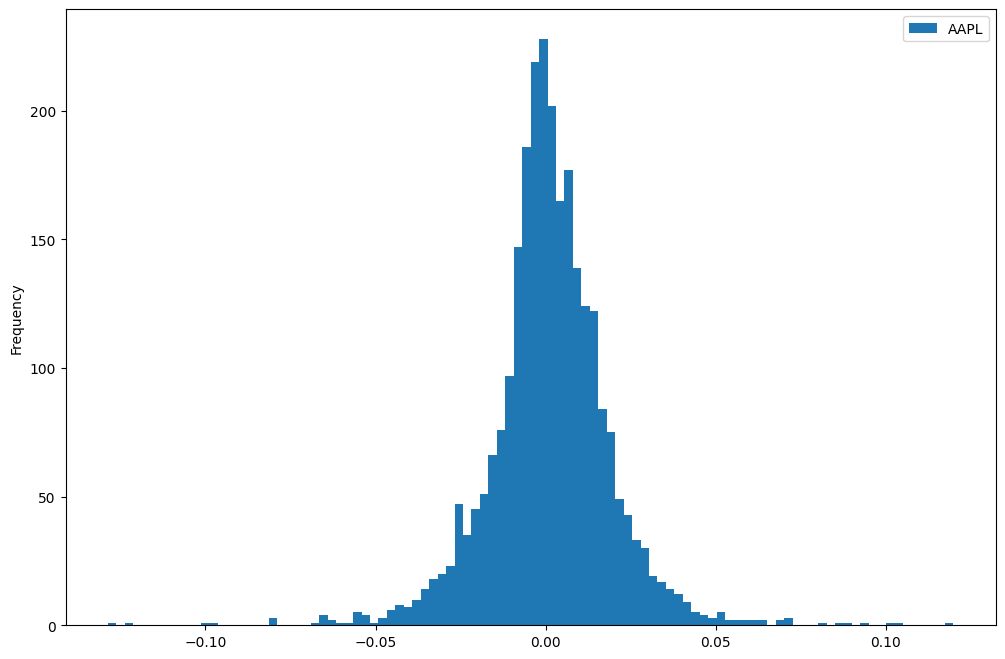

In [8]:
# Clean data
aapl = close.AAPL.copy().to_frame()
ret = aapl.pct_change().dropna() # Percentage change between the current and a prior element. 
ret.info()
ret.head()
ret.plot(kind = "hist", figsize = (12 ,8), bins = 100)

In [9]:
# Calculation of mean, variance and standar deviation
# For daily and annual time windows
daily_mean_Return = ret.mean()
var_daily_Returns = ret.var()
std_daily_Returns = np.sqrt(var_daily_Returns) # Same as ret.std()
ann_mean_Return = ret.mean() * 252 # Assume stock exchange is only open 252 days a year
ann_var_Returns = ret.var() * 252
ann_std_Returns = np.sqrt(ann_var_Returns) # Same as ret.std() * np.sqrt(252)



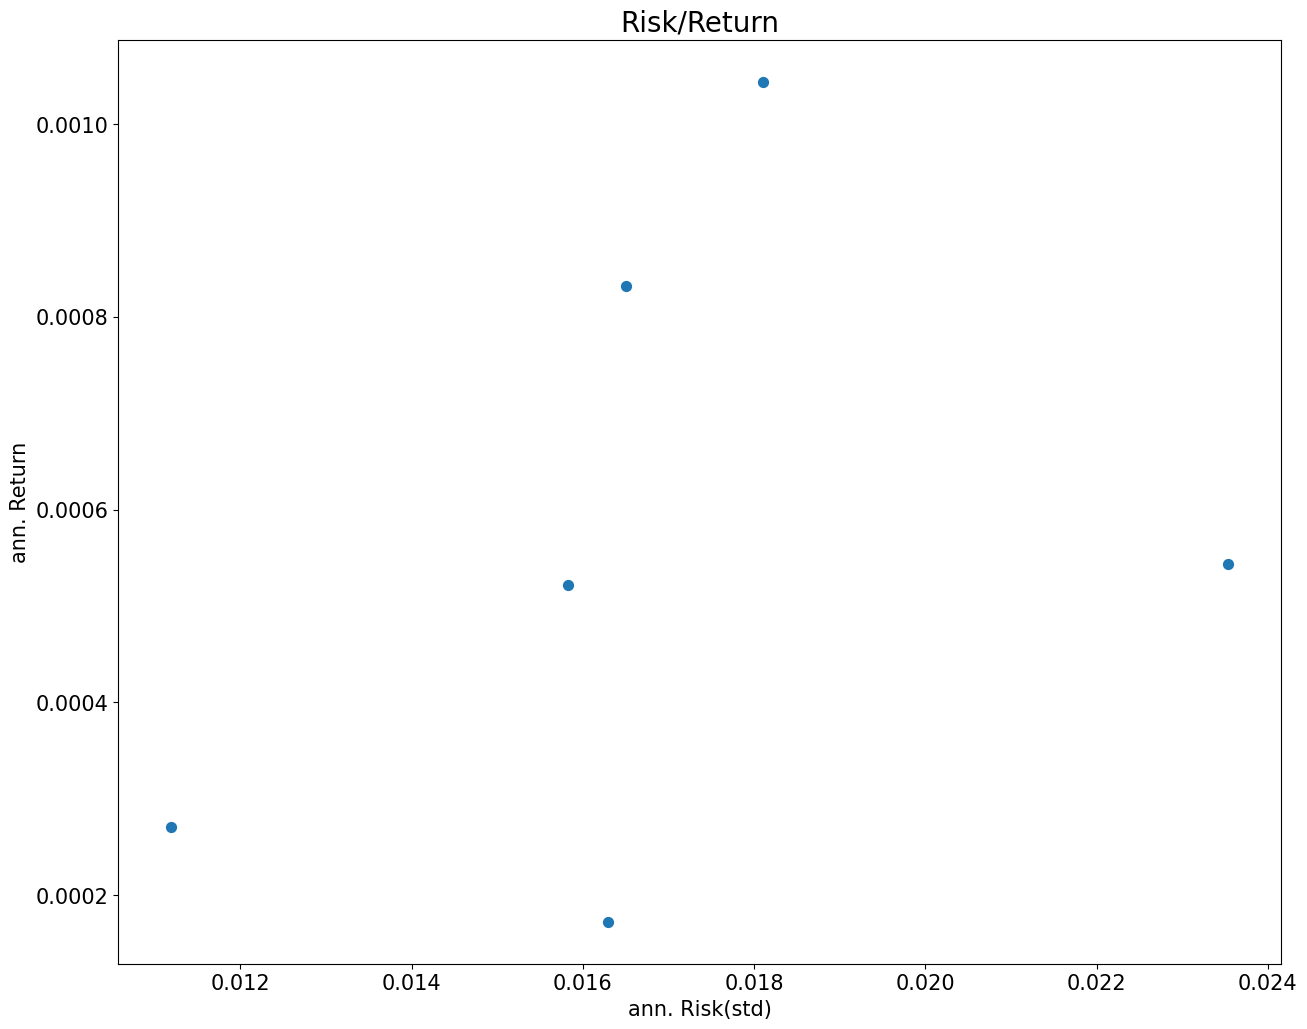

In [10]:
# Do it for all tickers
close.pct_change().dropna()
ret = close.pct_change().dropna()
summary = ret.describe().T.loc[:, ["mean", "std"]]
summary.plot(kind = "scatter", x = "std", y = "mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]+0.002, summary.loc[i, "mean"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

### Covariance and correlation matrices

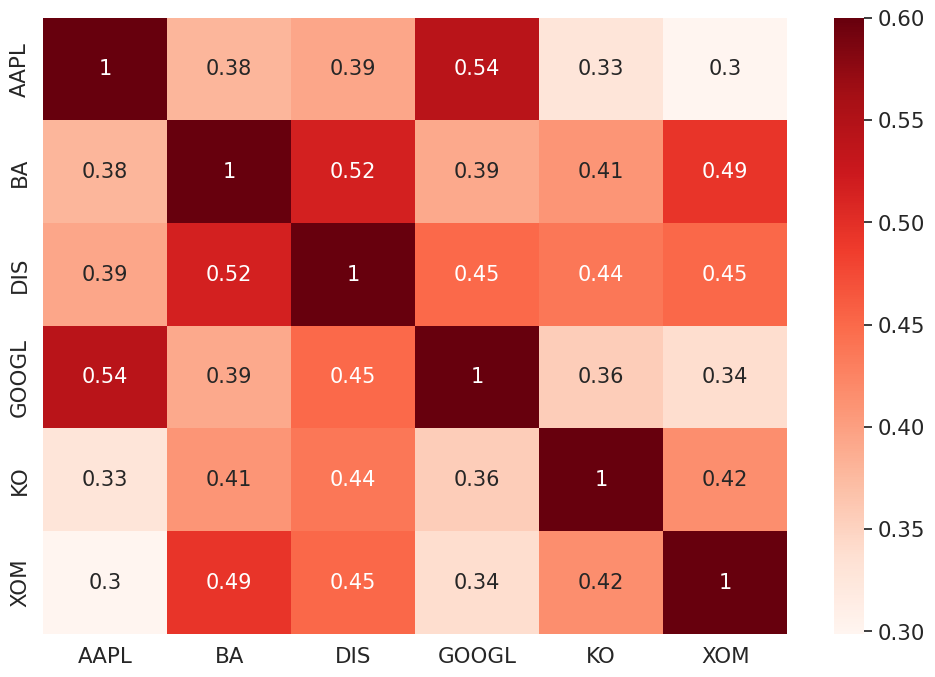

In [11]:
ret.cov()
ret.corr()
import seaborn as sns

plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(ret.corr(), cmap = "Reds", annot = True, annot_kws={"size":15}, vmax = 0.6)
plt.show()

In [17]:

df = pd.DataFrame(index = [2016, 2017, 2018], data = [100, 50, 95], columns = ["Price"])
simple_returns = df.pct_change().dropna()
log_returns = np.log(df / df.shift(1)).dropna()
print(df)
print(simple_returns)
print(log_returns)

      Price
2016    100
2017     50
2018     95
      Price
2017   -0.5
2018    0.9
         Price
2017 -0.693147
2018  0.641854


### SP500 SMA (Simple Moving Average)

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2012-01-03  1258.859985  1284.619995  1258.859985  1277.060059  1277.060059  \
2012-01-04  1277.030029  1278.729980  1268.099976  1277.300049  1277.300049   
2012-01-05  1277.300049  1283.050049  1265.260010  1281.060059  1281.060059   
2012-01-06  1280.930054  1281.839966  1273.339966  1277.810059  1277.810059   
2012-01-09  1277.829956  1281.989990  1274.550049  1280.699951  1280.699951   

                Volume  
Date                    
2012-01-03  3943710000  
2012-01-04  3592580000  
2012-01-05  4315950000  
2012-01-06  3656830000  
2012-01-09  3371600000  


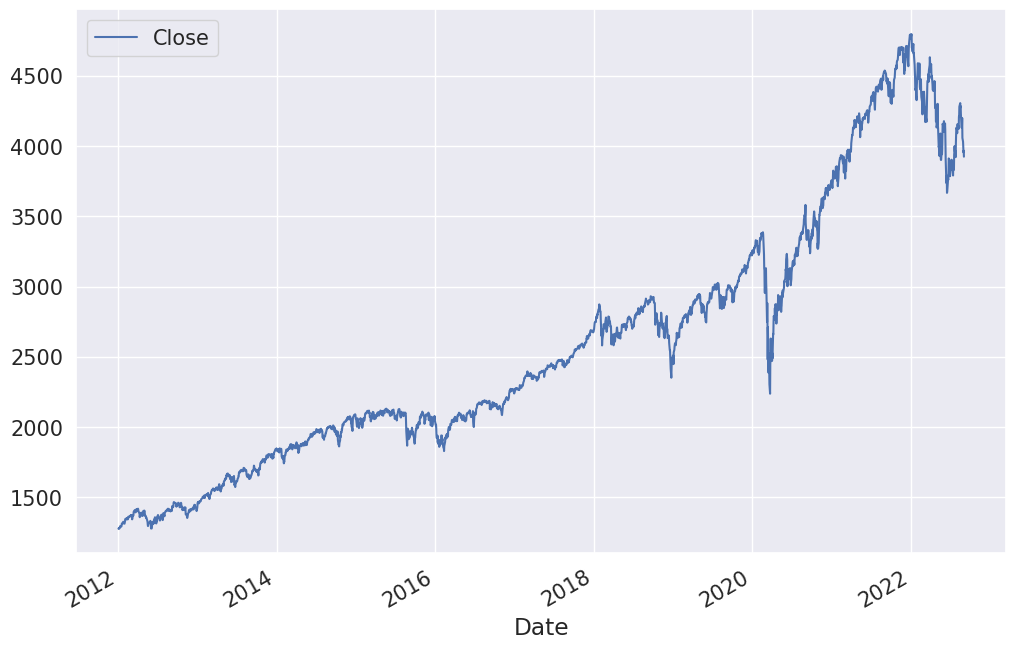

In [24]:
# Extract data and keep close.
SP500 = yf.download("^GSPC", start = "2012-01-01", end = "2022-09-06")
print(SP500.head())
SP500 = SP500.Close.to_frame()
SP500.plot(figsize = (12,8), fontsize= 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

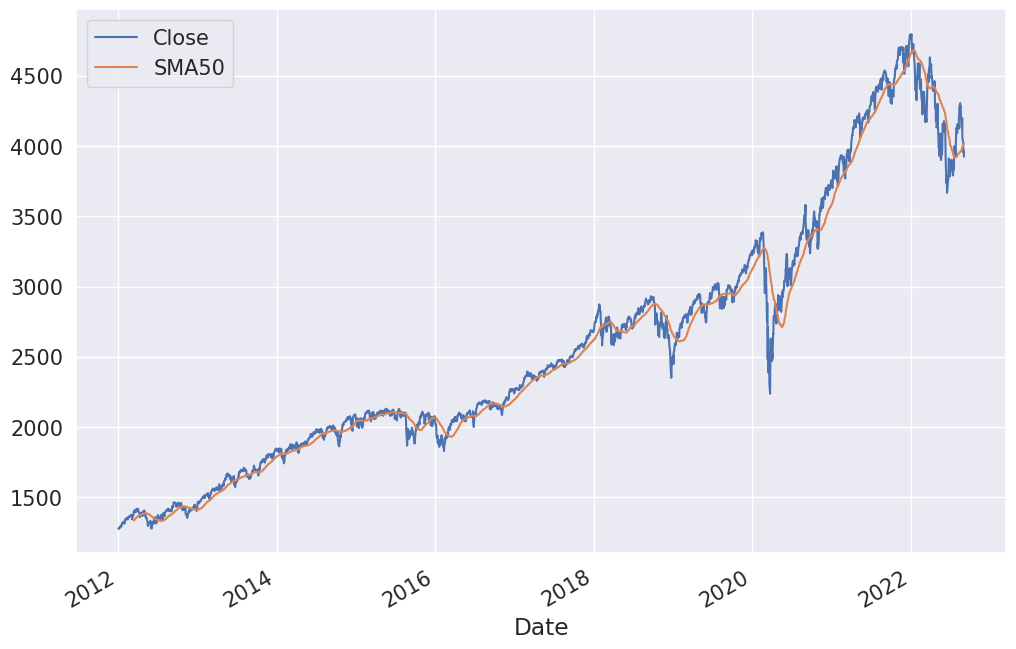

In [25]:
# Rolling windows
# 50 days moving average
SP500["SMA50"] = SP500.rolling(window = 50, min_periods=50).mean()
SP500.plot(figsize = (12, 8), fontsize = 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

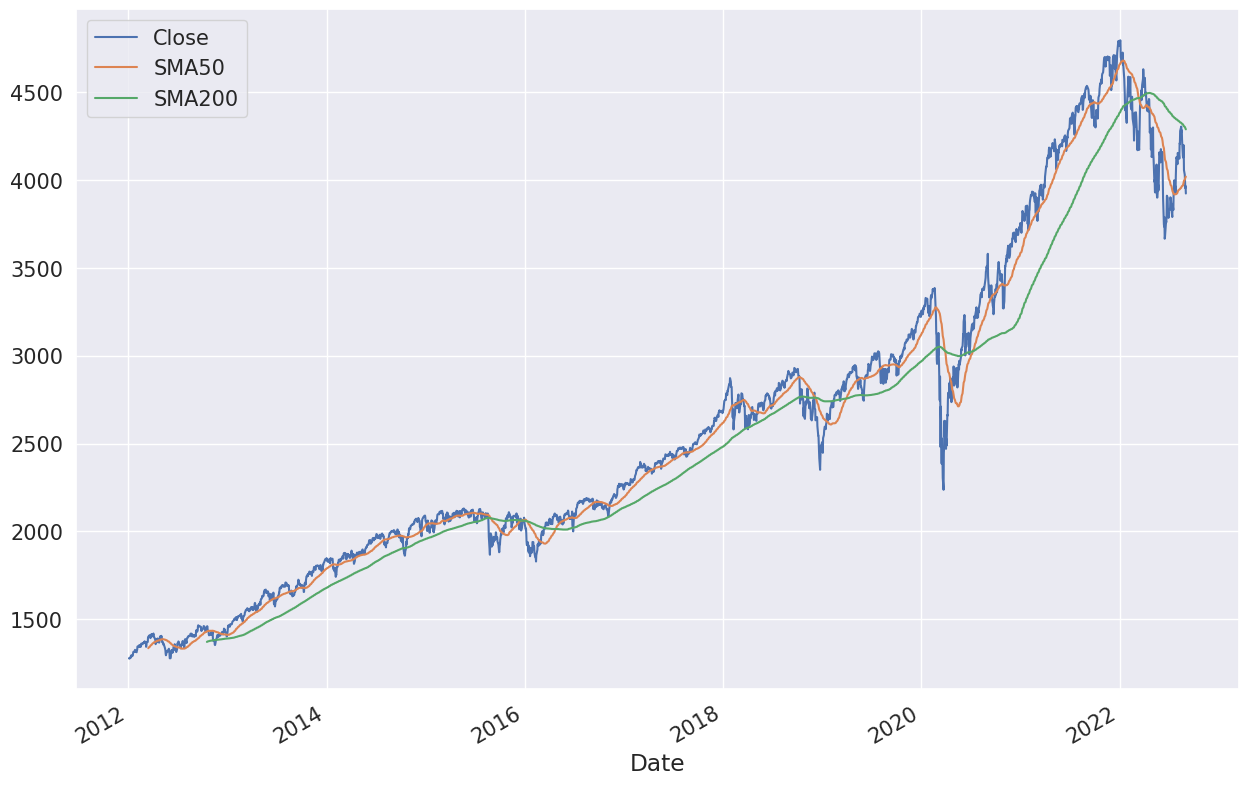

In [27]:
# 200 day mean rolling window
SP500["SMA200"] = SP500.Close.rolling(window = 200).mean()
SP500.plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

### Exponentially weighted moving  average

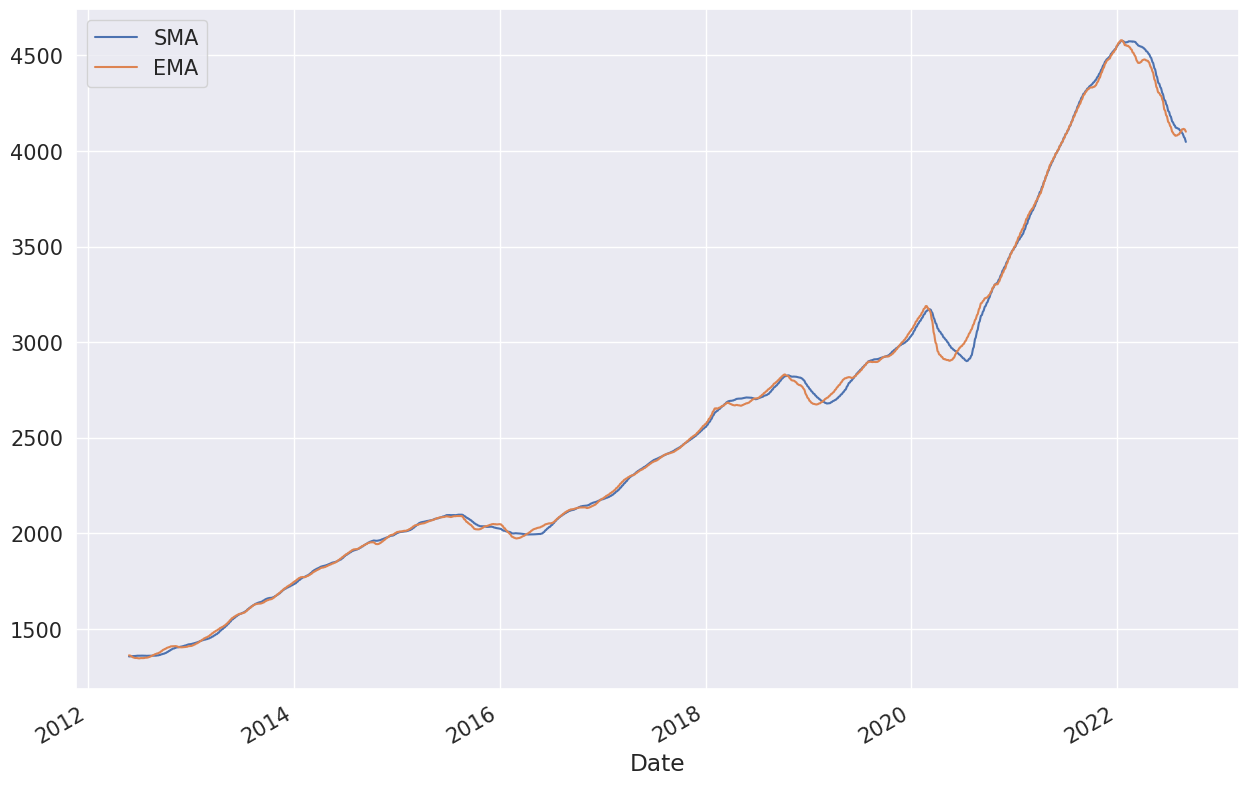

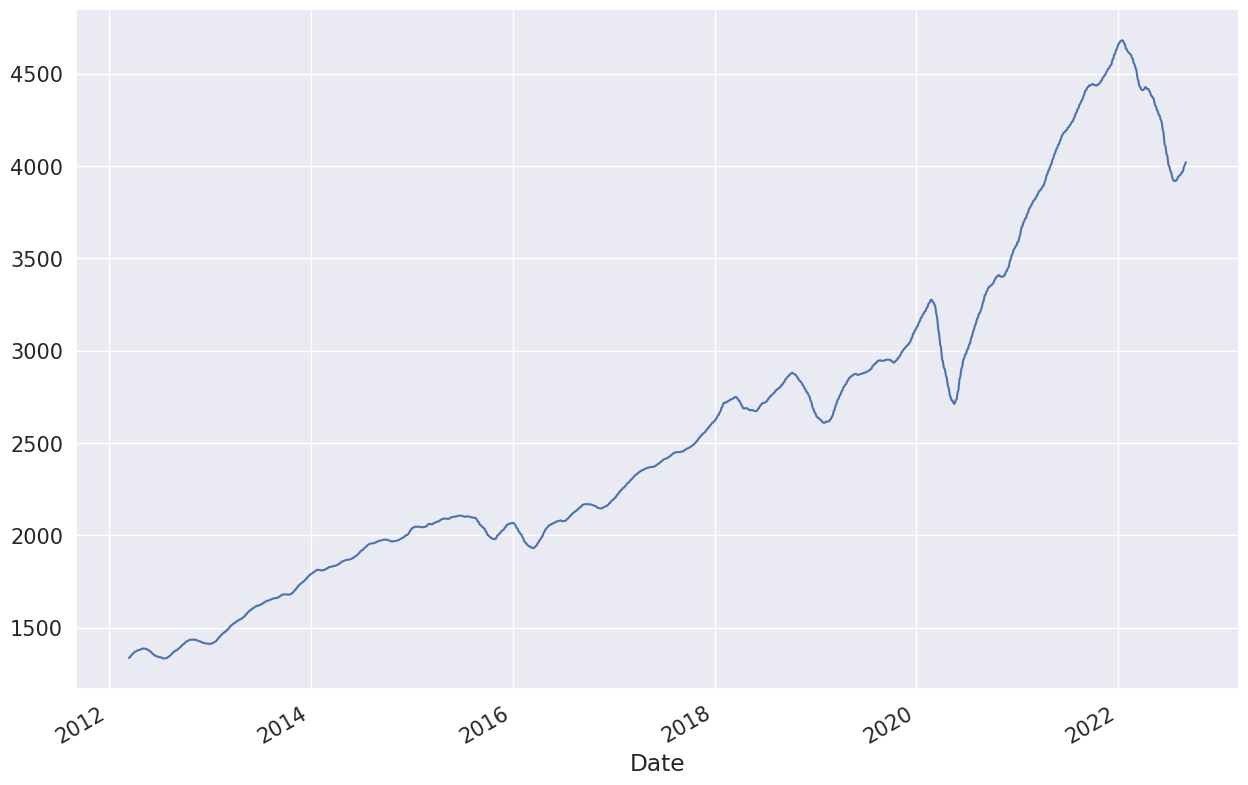

In [30]:

SP500["SMA"] = SP500.Close.rolling(window = 100).mean()
SP500["EMA"] = SP500.Close.ewm(span = 100, min_periods= 100).mean() # Exponentially weighted MA
SP500.iloc[:,-2:].plot(figsize = (15,10), fontsize =15)

plt.legend(fontsize = 15)
plt.show()

SP500.iloc[:,1].plot(figsize = (15,10), fontsize =15)
plt.show()